# 1. Getting started / Setup¶

In [783]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from IPython.display import Image
from datetime import datetime

<span style='font-family:Tahoma'>   </span>

In [784]:
df = pd.read_csv("/Users/brittarover/Capstone/Meteolytics/meteolytix_Artikelgruppen_Umsatz_verschiedeneStandorte.csv")

In [785]:
df['Warengruppe']=df['Artikelgruppe'].apply(lambda x: "Brot" if x in (1,2,3,4,5) else "Brötchen" if x in (6,7) 
                                            else "Spezial_Brötchen" if x==8 else
                                              "Konditorei" if x in (9,10) else "Kuchen" if x in (11,12) else "Weihnachtsartikel") 

In [786]:
df.head()

,Filiale,Datum,Artikelgruppe,Umsatz,Warengruppe
0,1,2015-01-07,1,50.092235,Brot
1,1,2015-01-27,1,57.002341,Brot
2,1,2015-01-30,1,52.920825,Brot
3,1,2015-02-02,1,89.343474,Brot
4,1,2015-02-05,1,68.717498,Brot


In [787]:
df.shape

(62330, 5)

<span style='font-family:Tahoma'>   
# Getting a feeling for my data & Business understanding</span>

<span style='font-family:Tahoma'>   

### Check columns / Definition

- **Filiale** - There are three different filial stores which are analyzed, one direct in the city (filiale=1), one near the water front (filiale=2) and the third in a residential area (filiale=3)
1 = city; 2 = waterfront area; 3 = city disctrict
- **Datum** - date of the sales data. The period 
- **Warengruppe** - main article group
1 = Brot; 2 = Brötchen; 3 = Spezial_Brötchen; 4 = Konditorei; 5 = Kuchen; 6 = Weihnachtsartikel    
- **Artikelgruppe** - article group
1 = Weizenbrot; 2 = Mischbrot; 3 = Vollkornbrot; 4 = Spezialbrot; 5 = Stangenbrote; 6 = Brötchen; 7 = Süße Brötchen; 8 = Herzhafte Brötchen; 9 = KonditoreiBlech1; 10 = KonditoreiBlech2; 11 = Stückgebäck; 12 = Blechkuchen; 13 = Weiohnachtsartikel;     
- **Umsatz** - Sales volumne per day and article group   

### Research


### Getting a feeling for my data

In [788]:
df.columns

Index(['Filiale', 'Datum', 'Artikelgruppe', 'Umsatz', 'Warengruppe'], dtype='object')

In [789]:
# check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62330 entries, 0 to 62329
Data columns (total 5 columns):
Filiale          62330 non-null int64
Datum            62330 non-null object
Artikelgruppe    62330 non-null int64
Umsatz           62330 non-null float64
Warengruppe      62330 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 2.4+ MB


In [790]:
df.nunique()

Filiale              3
Datum             1941
Artikelgruppe       13
Umsatz           62330
Warengruppe          6
dtype: int64

In [791]:
# sort of the data by Datum, Filiale and Artikelgruppe
df=df.sort_values(['Datum','Filiale','Warengruppe','Artikelgruppe'])


In [792]:
# statistical insights 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Filiale,62330.0,2.040558,0.808964,1.000000,1.000000,2.000000,3.00000,3.000000
Artikelgruppe,62330.0,6.431622,3.487911,1.000000,3.000000,6.000000,9.00000,13.000000
Umsatz,62330.0,135.684115,121.807193,-19.456941,69.405965,106.741737,161.33919,3154.149267


### Check for duplicates

In [793]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


### Check distribution

**Conclusions Distribution**
- `There are not so many sales values for Filiale 1 than for the two other Filialen. This is due to the fact that the Filiale is not openend on sundays regulary. The Filiale is openend on nearly every 1. sunday of a month, but there a quite a few exceptions to this rule.`


In [794]:
# Look at data skew; the skewness of values along an axis, returning 0 where all values are equal or if they follow 
# a normal distribution
df.skew()

Filiale         -0.073924
Artikelgruppe    0.115547
Umsatz           4.483212
dtype: float64

In [795]:
# Number of unique values for each column, sorted by count for the whole data set and for the single Filialen
df.T.apply(lambda x: x.nunique(), axis=1).sort_values(ascending=False)

Umsatz           62330
Datum             1941
Artikelgruppe       13
Warengruppe          6
Filiale              3
dtype: int64

In [796]:
df_1=df.query('Filiale== 1')
df_2=df.query('Filiale== 2')
df_3=df.query('Filiale== 3')

In [797]:
#Distribution for Filiale 1
df_1.T.apply(lambda x: x.nunique(), axis=1).sort_values(ascending=False)

Umsatz           19182
Datum             1662
Artikelgruppe       13
Warengruppe          6
Filiale              1
dtype: int64

In [798]:
#Distribution for Filiale 2
df_2.T.apply(lambda x: x.nunique(), axis=1).sort_values(ascending=False)

Umsatz           21438
Datum             1934
Artikelgruppe       13
Warengruppe          6
Filiale              1
dtype: int64

In [799]:
#Distribution for Filiale 3
df_3.T.apply(lambda x: x.nunique(), axis=1).sort_values(ascending=False)

Umsatz           21710
Datum             1933
Artikelgruppe       13
Warengruppe          6
Filiale              1
dtype: int64

# Data Cleaning & Preparation

### Check for Negative Values

**Conclusions Negative sales values**
- `There are in total 166 negative sales values. Affected are Artikelgruppe 5, 2 and 10.`
- `Maybe the negative values arise from unsold articles which can not be further processed to basketmehl.`


In [800]:
#Check for negative Valuesmehl.
df_neg_Umsatz=df.query('Umsatz<0')
df_neg_Umsatz.Artikelgruppe.value_counts(normalize=True)

5     0.987952
10    0.006024
2     0.006024
Name: Artikelgruppe, dtype: float64

### Check Null Values

### Clean Null Values

**Conclusions Null values**
- `The check does not show any  missing values due to the fact that exactly one row exists per sales`
- `But the df.describe / df.artikelgruppe.mean shows that are a lot of days with less than 13 entries. This is been handled later on during transformation of the dataset`

In [801]:
# checking null values
nan = pd.DataFrame(df.isnull().sum(),columns=['Count'])
nan['Percentage'] = round(nan.Count/df.shape[0]*100,1)
print(nan[nan.Count!=0])

Empty DataFrame
Columns: [Count, Percentage]
Index: []


### Transformation to Datetime

In [802]:
# Transformation to Datetime
df['Datum'] = pd.to_datetime(df['Datum'])


### New Indexing

In [803]:
df_index = df.set_index('Datum')


In [804]:
df_index.index

DatetimeIndex(['2015-01-02', '2015-01-02', '2015-01-02', '2015-01-02',
               '2015-01-02', '2015-01-02', '2015-01-02', '2015-01-02',
               '2015-01-02', '2015-01-02',
               ...
               '2020-06-01', '2020-06-01', '2020-06-01', '2020-06-01',
               '2020-06-01', '2020-06-01', '2020-06-01', '2020-06-01',
               '2020-06-01', '2020-06-01'],
              dtype='datetime64[ns]', name='Datum', length=62330, freq=None)

### Modify Dataframe with groupby and unstack 

In [805]:
type(df)

pandas.core.frame.DataFrame

In [806]:

df_new = pd.pivot_table(df, values='Umsatz', index=['Datum','Filiale'],
                    columns=['Artikelgruppe'], aggfunc=np.sum, fill_value=0).reset_index()

In [807]:
df_new_waren = pd.pivot_table(df, values='Umsatz', index=['Datum','Filiale'],
                    columns=['Warengruppe'], aggfunc=np.sum, fill_value=0).reset_index()

### Renaming Columnlabels and Adding a Gesamt Column

In [813]:
#new column All
df_new['Gesamt']=df_new[1]+df_new[2]+df_new[3]+df_new[4]+df_new[5]+df_new[6]+df_new[7]+df_new[8]+df_new[9]+df_new[10]+df_new[11]+df_new[12]+df_new[13]
df_new_waren['Gesamt']=df_new_waren['Brot']+df_new_waren['Brötchen']+df_new_waren['Kuchen']+df_new_waren['Konditorei']+df_new_waren['Spezial_Brötchen']+df_new_waren['Weihnachtsartikel']

In [815]:
df_new.rename(columns={1:'Weizenbrot',2:'Mischbrot',3:'Vollkornbrot',4:'Spezialbrot',5:'Stangenbrote',6:'Brötchen',
                       7:'Süsse_Brötchen', 8:'Herzhafte_Brötchen', 9:'KonditoreiBlech1', 10:'KonditoreiBlech2',11:'Stückgebäck', 
                       12:'Blechkuchen', 13:'Weihnachtsartikel'
                          }, 
                 inplace=True)

In [816]:
df_new.head(2)

Artikelgruppe,Datum,Filiale,Weizenbrot,Mischbrot,Vollkornbrot,Spezialbrot,Stangenbrote,Brötchen,Süsse_Brötchen,Herzhafte_Brötchen,KonditoreiBlech1,KonditoreiBlech2,Stückgebäck,Blechkuchen,Weihnachtsartikel,Gesamt
0,2015-01-02,1,39.994964,152.610944,121.284522,118.786757,0.000000,220.142630,181.329660,163.713061,62.492644,58.1696,266.254971,93.169864,0.000000,1477.949617
1,2015-01-02,2,88.023750,84.633190,115.157621,58.999279,66.687652,505.565569,235.597443,87.759013,66.333083,0.0000,249.331193,36.972801,113.343095,1708.403690


In [817]:
df_new_index = df_new.set_index('Datum')


### Additional Date columns

In [818]:
df_new['Wochentag']=df_new['Datum'].dt.weekday
df_new['Jahr']=df_new['Datum'].dt.year
df_new['Monat']=df_new['Datum'].dt.month
df_new['Wochenende']=df_new['Wochentag'].apply(lambda x: 'Wochentag' if x in (0,1,2,3,4) else 'Wochenende')

In [819]:
df_new_waren['Wochentag']=df_new_waren['Datum'].dt.weekday
df_new_waren['Jahr']=df_new_waren['Datum'].dt.year
df_new_waren['Monat']=df_new_waren['Datum'].dt.month
df_new_waren['Wochenende']=df_new_waren['Wochentag'].apply(lambda x: 'Wochentag' if x in (0,1,2,3,4) else 'Wochenende' )

# First Conclusions

## On Artikelgruppen level

**Conclusions**
- `There are a lot of stronger correlations between the Filiale and the single Artikelgruppen.`
- `There are also a lot of stronger correlations between the Artikelgruppen itself.`

In [670]:
#First we create a new DataFrame with only numerical features
numerics = ['int64', 'float64']

num_df = df_new.select_dtypes(include=numerics)

<function matplotlib.pyplot.show(close=None, block=None)>

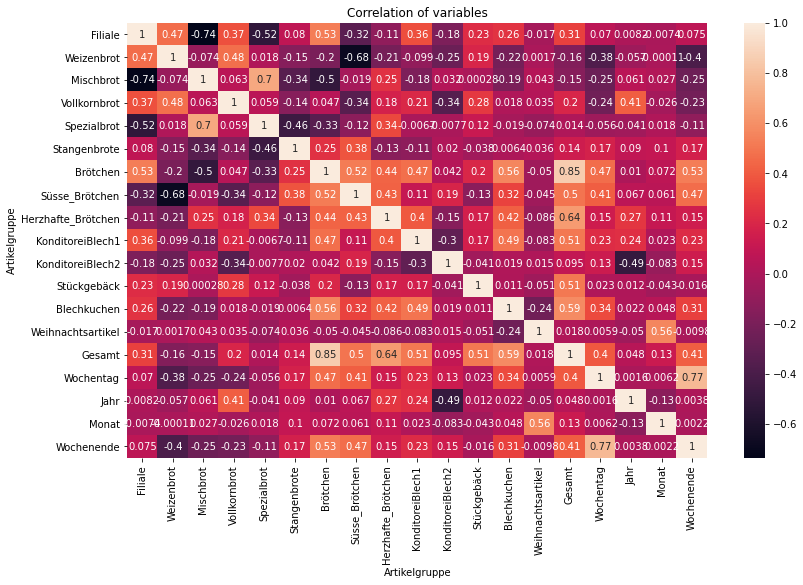

In [671]:
#Korrelationsanalyse
corr = num_df
plt.figure(figsize=(13,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,annot=True)
plt.savefig('correlogram_simple.png')
plt.show

## On Warengruppen level

In [672]:
#First we create a new DataFrame with only numerical features
numerics = ['int64', 'float64']

num_df_waren = df_new_waren.select_dtypes(include=numerics)

<function matplotlib.pyplot.show(close=None, block=None)>

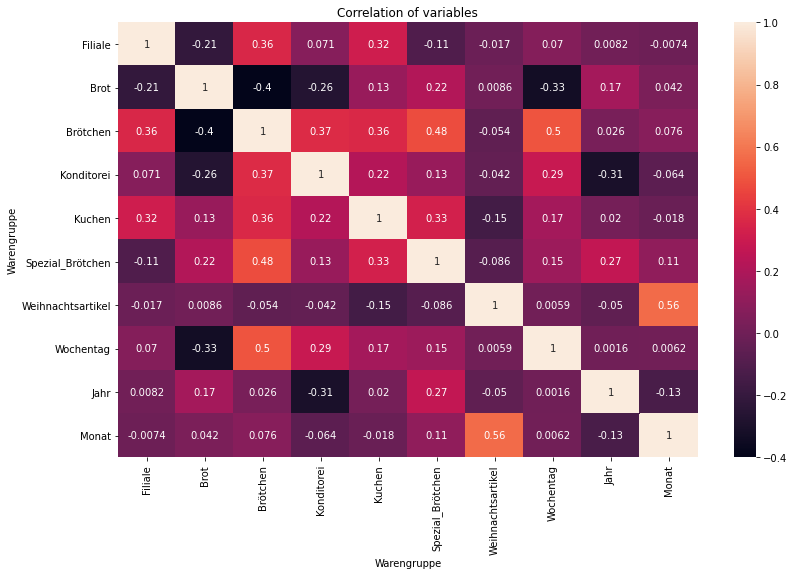

In [673]:
#Korrelationsanalyse
corr = num_df_waren
plt.figure(figsize=(13,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,annot=True)
plt.savefig('correlogram_simple.png')
plt.show

# Data Exploration

Explore sales for Filiale in total

In [674]:
df_1=df.query('Filiale== 1')
df_2=df.query('Filiale== 2')
df_3=df.query('Filiale== 3')

In [1171]:
df_new_1=df_new.query('Filiale==1')
df_new_2=df_new.query('Filiale==2')
df_new_3=df_new.query('Filiale==3')


In [675]:
df_1_index=df_index.query('Filiale== 1')
df_2_index=df_index.query('Filiale== 2')
df_3_index=df_index.query('Filiale== 3')

## Salestrends overall

Text(0.5, 1.0, 'Revenue per store and year')

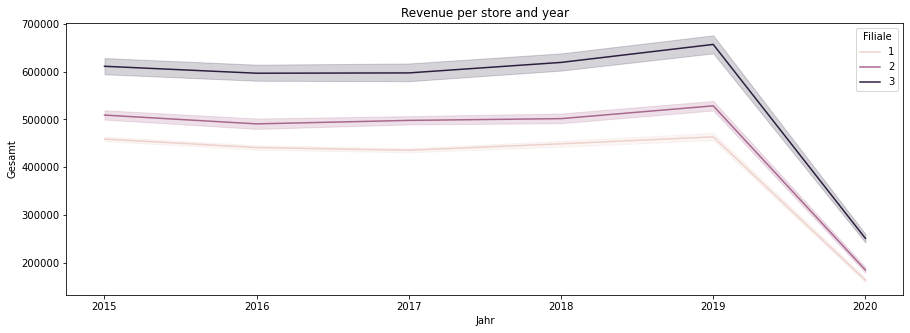

In [1144]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Jahr',y='Gesamt',hue='Filiale',data=df_new,estimator='sum')
plt.title('Revenue per store and year')

### Filiale 1

**Conclusions FILIALE 1**
- `Sales in total are relatively constant. In March 2020 Corona starts..`

#### Sales in total

<function matplotlib.pyplot.show(close=None, block=None)>

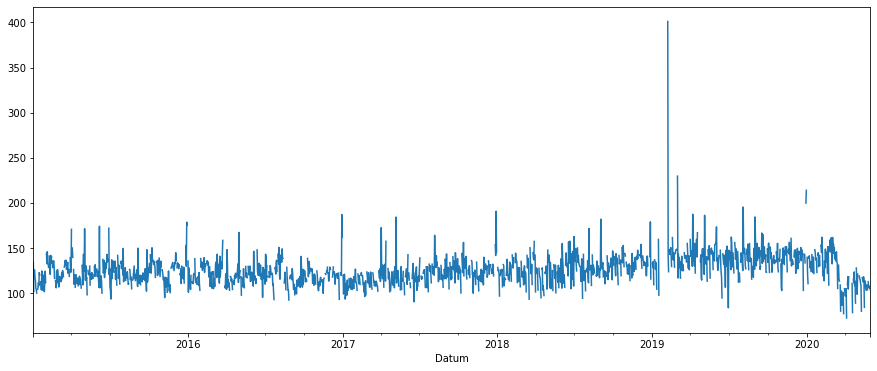

In [676]:
y_1 = df_1_index['Umsatz'].resample('D').mean()
y_1.plot(figsize=(15, 6))

plt.show

#ax=fig.add_subplot(1,1,1)
#'crisis_data=[
#    (datetime(2020,3,17)-'Start Lockdown Corona')
#]
#for date, label in crisis_data:
#    ax.annotate(label,xy=(date,y_1.asof(date)+75),
#                xytext=(date,y_1.asof(date)+225),
#                arrowprops=dict(facecolor='black',headwidth=4,width=2,headlength=4),
#                horizontalalignment='left',verticalalignment='top')
#ax.set_title('Sales trend in total for Filiale 1')    
 

In [634]:
df_1.loc[df_1['Umsatz'].idxmax()]


Filiale                   1
Datum            2018-12-31
Artikelgruppe            11
Umsatz              1091.66
Warengruppe          Kuchen
Name: 16903, dtype: object

#### Sales on Months

Text(0.5, 1.0, 'Revenue per Filiale 1 and Month')

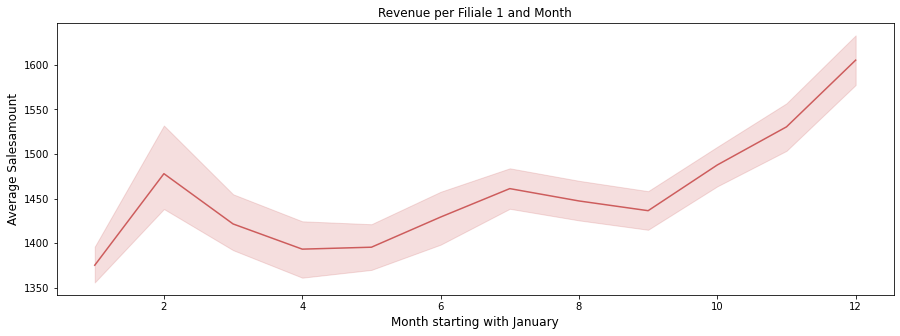

In [1167]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Monat',y='Gesamt',data=df_new_1,estimator='mean',color='indianred')
plt.xlabel("Month starting with January", fontsize=12)
plt.ylabel("Average Salesamount", fontsize=12)
plt.title('Revenue per Filiale 1 and Month')

#### Sales on Weekdays

Text(0.5, 1.0, 'Revenue per Filiale 1 and Weekday')

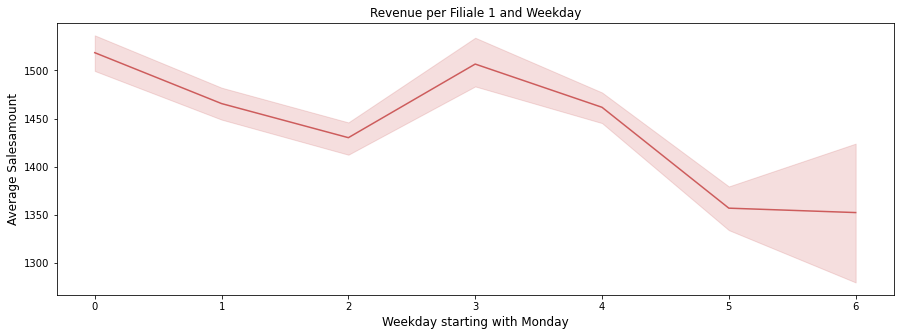

In [1168]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Wochentag',y='Gesamt',data=df_new_1,estimator='mean',color='indianred')
plt.xlabel("Weekday starting with Monday", fontsize=12)
plt.ylabel("Average Salesamount", fontsize=12)
plt.title('Revenue per Filiale 1 and Weekday')

### Filiale 2

**Conclusions FILIALE 2**
- `Sales in total are relatively constant over the years.`
- `But there is a strong seasonal effect. During summertime they are higher sales for all the years`
- `There is also a weekday effect, but not a strong one. The values are a bit higher for saturdays and sundays. The lowest values are on wednesdays. Kiel is a attractive holiday destination for extended weekendtrips.
`


#### Sales in total

<function matplotlib.pyplot.show(close=None, block=None)>

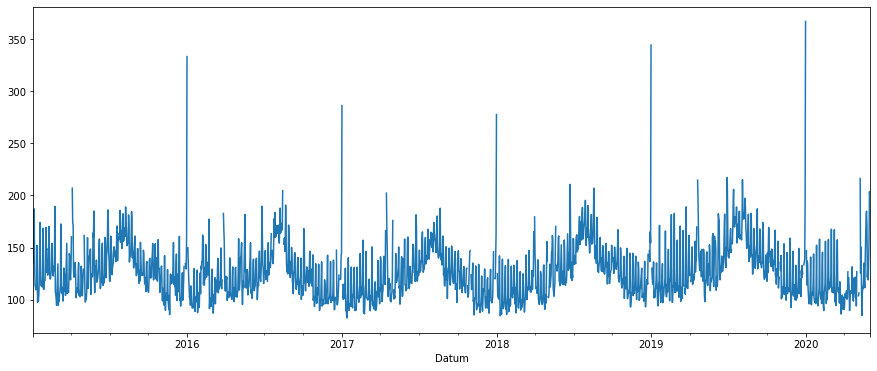

In [1169]:
y_2 = df_2_index['Umsatz'].resample('D').mean()
y_2.plot(figsize=(15, 6))

plt.show

#### Sales on Months

Text(0.5, 1.0, 'Revenue per Filiale 2 and Month')

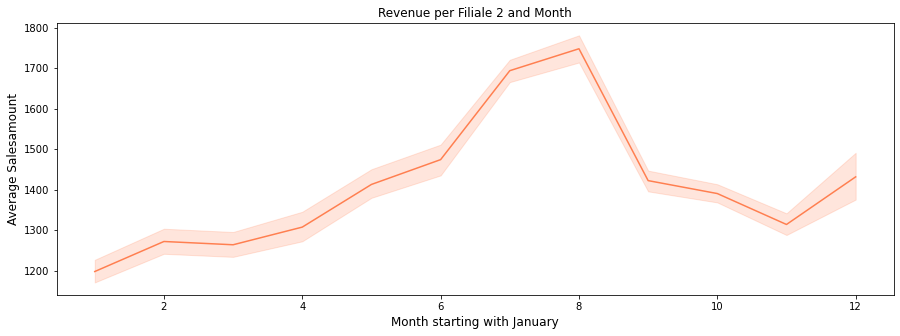

In [1164]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Monat',y='Gesamt',data=df_new_2,estimator='mean',color='coral')
plt.xlabel("Month starting with January", fontsize=12)
plt.ylabel("Average Salesamount", fontsize=12)
plt.title('Revenue per Filiale 2 and Month')

In [1165]:
pivot_2=pd.pivot_table(df_2,index=df['Datum'].dt.month,columns=df['Datum'].dt.year,
               values='Umsatz',aggfunc=np.sum)

In [690]:
pivot_2.pct_change()

Datum,2015,2016,2017,2018,2019,2020
Datum,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.030913,0.147469,-0.028330,-0.030037,-0.019757,-0.005925
3,0.053455,-0.038791,0.083580,0.160046,0.105643,0.032451
4,-0.012105,-0.042079,0.095479,-0.039327,0.047268,-0.088629
5,0.055466,0.249076,0.009669,0.100180,-0.006060,0.196112
6,0.025488,-0.047205,0.069233,0.100593,0.117312,-0.949506
7,0.185945,0.126791,0.108573,0.232535,0.145312,0.000000
8,0.087723,0.129706,0.021721,-0.019679,0.021759,0.000000
9,-0.268817,-0.193576,-0.201586,-0.181278,-0.164718,0.000000


#### Sales on Weekdays

Text(0.5, 1.0, 'Average Revenue per Filiale 2 and Weekday')

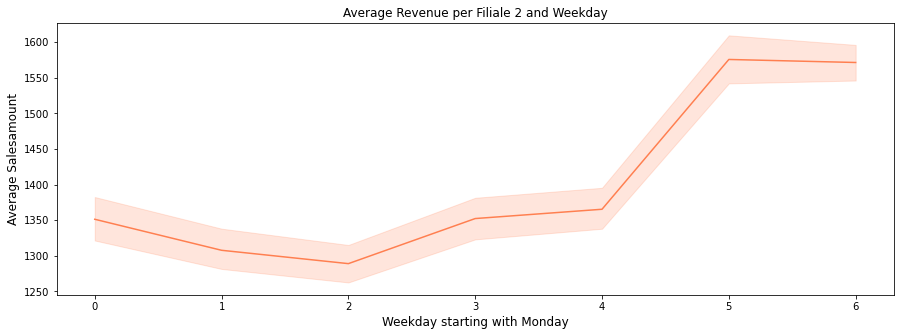

In [1163]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Wochentag',y='Gesamt',data=df_new_2,estimator='mean',color='coral')
plt.xlabel("Weekday starting with Monday", fontsize=12)
plt.ylabel("Average Salesamount", fontsize=12)
plt.title('Average Revenue per Filiale 2 and Weekday', fontsize=12)

### Filiale 3

**Conclusions FILIALE 3**
- `Sales values in total are relatively constant over the years until Corona starts in march 2020..`
- `But there is a strong relationsship between weekday and over-all salesvalue. For weekends the values are significant higher. This is valid for all the years.`

#### Sales in total

<function matplotlib.pyplot.show(close=None, block=None)>

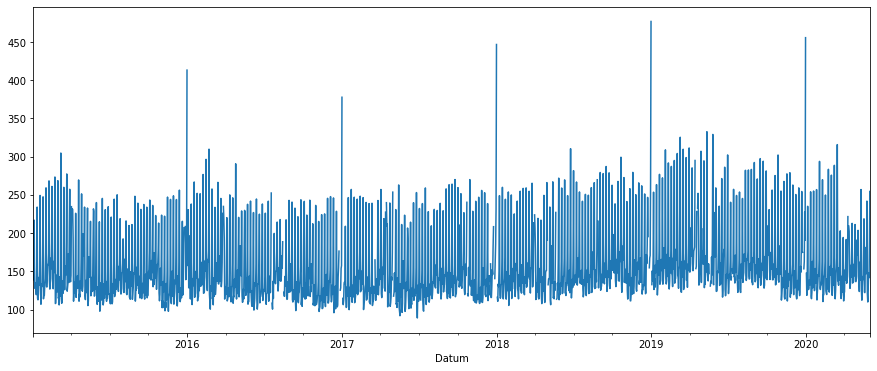

In [694]:
y_3 = df_3_index['Umsatz'].resample('D').mean()
y_3.plot(figsize=(15, 6))

plt.show

#### Sales on Months

Text(0.5, 1.0, 'Revenue per Filiale 3 and Month')

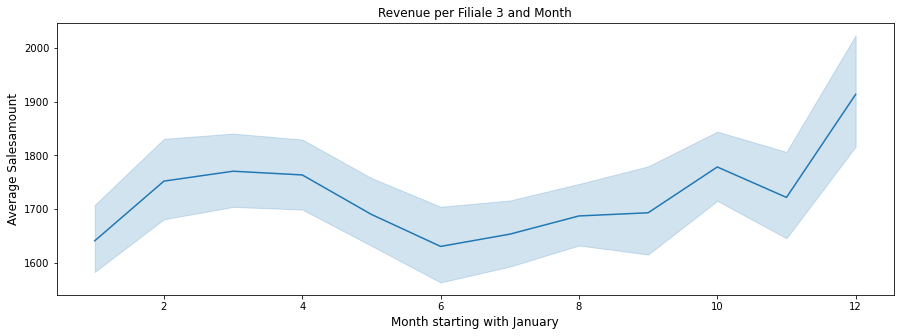

In [1175]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Monat',y='Gesamt',data=df_new_3,estimator='mean')
plt.xlabel("Month starting with January", fontsize=12)
plt.ylabel("Average Salesamount", fontsize=12)
plt.title('Revenue per Filiale 3 and Month')

####  Sales on weekdays

Text(0.5, 1.0, 'Average Revenue per Filiale 3 and Weekday')

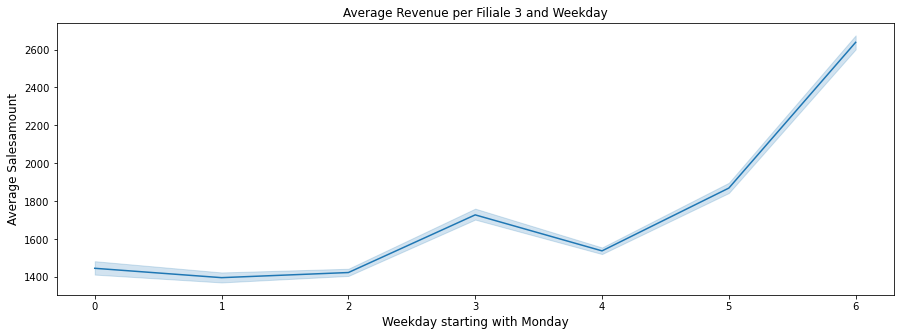

In [1173]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Wochentag',y='Gesamt',data=df_new_3,estimator='mean')
plt.xlabel("Weekday starting with Monday", fontsize=12)
plt.ylabel("Average Salesamount", fontsize=12)
plt.title('Average Revenue per Filiale 3 and Weekday', fontsize=12)

## Explore sales for Filiale and Warengruppe in total

### Filiale 1

In [699]:
df_1_waren=df_1.groupby('Warengruppe').Umsatz.sum().reset_index()
print(df_1_waren)

         Warengruppe         Umsatz
0               Brot  757834.842920
1           Brötchen  681637.941866
2         Konditorei  192546.930395
3             Kuchen  517188.165928
4   Spezial_Brötchen  237148.448137
5  Weihnachtsartikel   26249.869813


In [700]:
import plotly.express as px

fig = px.pie(df_1_waren, values='Umsatz', names='Warengruppe', color_discrete_sequence=px.colors.sequential.RdBu)
             #color='Warengruppe',
             #color_discrete_map={'Brot':'lightcyan',
                                # 'Brötchen':'cyan',
                                # 'Spezial_Brötchen':'royalblue',
                                 #'Konditorei':'royalblue',
                                 #'Kuchen':'darkblue',
fig.update_layout(title_text='Split of the salesvolumne for Filiale 1 / Warengruppenlevel', title_x=0.5)             
fig.show()

In [701]:
df_new_wg1=df_new_waren.query('Filiale==1')
df_new_wg1.head(2)

Warengruppe,Datum,Filiale,Brot,Brötchen,Konditorei,Kuchen,Spezial_Brötchen,Weihnachtsartikel,Wochentag,Jahr,Monat,Wochenende
0,2015-01-02,1,432.677186,401.472290,120.662244,359.424835,163.713061,0.0,4,2015,1,Wochentag
3,2015-01-03,1,413.633899,303.963215,132.040099,275.767533,96.178848,0.0,5,2015,1,Wochenende


#### Weekendeffect?

In [702]:
df_1_wg=df_new_wg1.groupby("Wochenende")['Brot','Brötchen','Konditorei','Kuchen',
                                         'Spezial_Brötchen','Weihnachtsartikel'].mean().stack().reset_index()
df_1_wg.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [703]:
fig = px.bar(df_1_wg, x="Warengruppe", y='Umsatz', color='Wochenende',barmode='group',
             color_discrete_sequence=px.colors.sequential.RdBu, title="Weekend sales compared to weekday sales for Filiale 1")
fig.show()

#### Saisonal effect?

In [704]:
df_1_wg2=df_new_wg3.groupby("Monat")['Brot','Brötchen','Konditorei','Kuchen',
                                         'Spezial_Brötchen','Weihnachtsartikel'].mean().stack().reset_index()
df_1_wg2.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [705]:
fig = px.bar(df_1_wg2, x="Monat", y='Umsatz', color='Warengruppe',barmode='group',
             color_discrete_sequence=px.colors.sequential.RdBu, title="average sales compared on month for Filiale 1")
fig.show()

### Filiale 2


In [706]:
df_2_waren=df_2.groupby('Warengruppe').Umsatz.sum().round(2).reset_index()
print(df_2_waren)

         Warengruppe      Umsatz
0               Brot   672304.66
1           Brötchen  1132189.07
2         Konditorei   195312.75
3             Kuchen   485331.27
4   Spezial_Brötchen   185921.95
5  Weihnachtsartikel    41951.99


In [707]:
fig = px.pie(df_2_waren, values='Umsatz', names='Warengruppe', color_discrete_sequence=px.colors.sequential.matter)
             #color='Warengruppe',
             #color_discrete_map={'Brot':'lightcyan',
                                # 'Brötchen':'cyan',
                                # 'Spezial_Brötchen':'royalblue',
                                 #'Konditorei':'royalblue',
                                 #'Kuchen':'darkblue'},
             
fig.update_layout(title_text='Split of the salesvolumne for Filiale 2 / Warengruppenlevel', title_x=0.5)
fig.show()

In [708]:
df_new_wg2=df_new_waren.query('Filiale==2')
df_new_wg2.head(2)

Warengruppe,Datum,Filiale,Brot,Brötchen,Konditorei,Kuchen,Spezial_Brötchen,Weihnachtsartikel,Wochentag,Jahr,Monat,Wochenende
1,2015-01-02,2,413.501492,741.163012,66.333083,286.303994,87.759013,113.343095,4,2015,1,Wochentag
4,2015-01-03,2,396.030119,737.623094,47.299856,249.041752,86.991906,109.207363,5,2015,1,Wochenende


#### Weekendeffect?

In [709]:
df_2_wg=df_new_wg2.groupby("Wochenende")['Brot','Brötchen','Konditorei','Kuchen',
                                         'Spezial_Brötchen','Weihnachtsartikel'].mean().stack().reset_index()
df_2_wg.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [710]:
fig = px.bar(df_2_wg, x="Warengruppe", y='Umsatz', color='Wochenende',barmode='group',
             color_discrete_sequence=px.colors.sequential.matter, title="Weekend sales compared to weekday sales for Filiale 2")
fig.show()

#### Saisonal effect?

In [711]:
df_2_wg2=df_new_wg2.groupby("Monat")['Brot','Brötchen','Konditorei','Kuchen',
                                         'Spezial_Brötchen','Weihnachtsartikel'].mean().stack().reset_index()
df_2_wg2.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [712]:
fig = px.bar(df_2_wg2, x="Monat", y='Umsatz', color='Warengruppe',barmode='group',
             color_discrete_sequence=px.colors.sequential.matter, title="average sales compared on month for Filiale 2")
fig.show()

### Filiale 3

In [713]:
df_3_waren=df_3.groupby('Warengruppe').Umsatz.sum().round(2).reset_index()
print(df_3_waren)

         Warengruppe      Umsatz
0               Brot   784213.18
1           Brötchen  1234976.71
2         Konditorei   241059.84
3             Kuchen   795690.91
4   Spezial_Brötchen   248236.77
5  Weihnachtsartikel    27395.61


In [714]:
fig = px.pie(df_3_waren, values='Umsatz', names='Warengruppe', color_discrete_sequence=px.colors.diverging.balance)
             #color='Warengruppe',
             #color_discrete_map={'Brot':'lightcyan',
                                # 'Brötchen':'cyan',
                                # 'Spezial_Brötchen':'royalblue',
                                 #'Konditorei':'royalblue',
                                 #'Kuchen':'darkblue'},
             #title='Split of the salesvolumne for Filiale 3 / Warengruppenlevel')
fig.update_layout(title_text='Split of the salesvolumne for Filiale 3 / Warengruppenlevel', title_x=0.5)
fig.show()

In [1176]:
df_new_wg3=df_new_waren.query('Filiale==3')
df_new_wg3.head(2)

Warengruppe,Datum,Filiale,Brot,Brötchen,Konditorei,Kuchen,Spezial_Brötchen,Weihnachtsartikel,Gesamt,Wochentag,Jahr,Monat,Wochenende
2,2015-01-02,3,428.254892,509.715794,89.217757,416.231324,84.363152,0.0,1527.782919,4,2015,1,Wochentag
5,2015-01-03,3,365.088232,679.558210,126.642524,273.505951,86.776803,0.0,1531.571720,5,2015,1,Wochenende


#### Weekendeffect?

In [716]:
df_3_wg=df_new_wg3.groupby("Wochenende")['Brot','Brötchen','Konditorei','Kuchen',
                                         'Spezial_Brötchen','Weihnachtsartikel'].mean().stack().reset_index()
df_3_wg.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [947]:
fig = px.bar(df_3_wg, x="Warengruppe", y='Umsatz', color='Wochenende',barmode='group',
             color_discrete_sequence=px.colors.diverging.balance, title="Weekend sales compared to weekday sales for Filiale 3")
fig.show()

#### Saisonal effect?

In [1132]:
df_3_wg2=df_new_wg3.groupby("Monat")['Brot','Brötchen','Konditorei','Kuchen',
                                         'Spezial_Brötchen','Weihnachtsartikel'].mean().stack().reset_index()
df_3_wg2.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [719]:
fig = px.bar(df_3_wg2, x="Monat", y='Umsatz', color='Warengruppe',barmode='group',
             color_discrete_sequence=px.colors.diverging.balance, title="average sales compared on month for Filiale 3")
fig.show()

## Explore sales for Filiale and Artikelgruppe in total

### Filiale 1

**Conclusions FILIALE 1**
- `Sales in total are relatively constant. This is also valid for each of the Artikelgruppen..`
- `The highest Salesvolumne per Artikelgruppe was 1091,65€ for Artikelgruppe 11:= Stückgebäck on New Year's Eve
2018, everbody buys Berliner for New Year's Eve.`
- `The highest Salesvolumne per Filiale was 4411.73€ with also a hugh salesvolumne at Artikelgruppe 11:= Stückgebäck. On this day was a store reopening, the bakery has been closed for a couple of 3 weeks, since the 17th of january.`

In [1190]:
print(df_new_1.loc[df_new_1['Stückgebäck'].idxmax()]['Stückgebäck'])
print(df_new_1.loc[df_new_1['Stückgebäck'].idxmax()].Datum)

1091.65562288703
2018-12-31 00:00:00


In [1083]:
print(df_new_1.loc[df_new_1['Gesamt'].idxmax()]['Gesamt'])
print(df_new_1.loc[df_new_1['Gesamt'].idxmax()].Datum)

4411.732215094437
2019-02-07 00:00:00


In [1084]:
df_new_1.query('Jahr==2019 and (Monat==1)').T

,4106,4109,4112,4115,4120,4123,4126,4129,4132,4135,4144,4147
Artikelgruppe,,,,,,,,,,,,
Datum,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-05 00:00:00,2019-01-07 00:00:00,2019-01-08 00:00:00,2019-01-09 00:00:00,2019-01-10 00:00:00,2019-01-11 00:00:00,2019-01-12 00:00:00,2019-01-16 00:00:00,2019-01-17 00:00:00
Filiale,1,1,1,1,1,1,1,1,1,1,1,1
Weizenbrot,65.9308,60.1825,45.669,46.2778,88.306,46.0219,24.3494,56.6219,36.9557,65.0913,50.3247,38.1725
Mischbrot,153.588,130.927,128.453,113.913,172.529,150.279,146.39,156.807,129.577,132.67,145.975,104.947
Vollkornbrot,132.569,128.501,118.158,118.176,175.942,183.895,139.874,147.6,149.79,103.936,147.58,117.878
Spezialbrot,140.532,112.573,121.078,115.003,137.362,160.758,129.58,126.735,153.042,158.724,132.512,122.758
Stangenbrote,14.0177,22.8148,20.209,-0.737156,21.7609,10.4032,19.208,0.887149,14.6891,2.39294,21.3723,11.3001
Brötchen,231.394,244.712,244.754,229.103,258.68,250.766,258.881,236.081,203.187,180.843,285.998,160.875
Süsse_Brötchen,191.056,183.88,188.09,179.468,164.784,170.437,166.392,194.544,190.268,162.747,208.062,161.505


#### Sales in dependency of weekends

In [1085]:
df_1_art=df_new_1.groupby("Wochenende")['Weizenbrot','Mischbrot','Vollkornbrot','Spezialbrot','Stangenbrote',
                                        'Brötchen','Süsse_Brötchen','Herzhafte_Brötchen','KonditoreiBlech1','KonditoreiBlech2',
                                        'Stückgebäck','Blechkuchen',
                                        'Weihnachtsartikel'].mean().stack().reset_index()
df_1_art.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [1086]:
fig = px.bar(df_1_art, x="Artikelgruppe", y='Umsatz', color='Wochenende',barmode='group',
             color_discrete_sequence=px.colors.sequential.RdBu, title="Weekend sales compared to weekday sales for Filiale 1")
fig.show()

#### Sales in dependency of weekdays

In [1087]:
df_1_art2=df_new_1.groupby("Wochentag")['Weizenbrot','Mischbrot','Vollkornbrot','Spezialbrot','Stangenbrote',
                                        'Brötchen','Süsse_Brötchen','Herzhafte_Brötchen','KonditoreiBlech1','KonditoreiBlech2',
                                        'Stückgebäck','Blechkuchen',
                                        'Weihnachtsartikel'].mean().stack().reset_index()
df_1_art2.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)


In [1187]:
fig = px.bar(df_1_art2, x="Wochentag", y='Umsatz', color='Artikelgruppe',barmode='group',
             color_discrete_sequence=px.colors.sequential.RdBu, 
              title="Weekday sales compared to each weekday for Filiale 1")
fig.show()

#### Sales in dependency of month

In [1089]:
df_1_art_month=df_new_1.groupby("Monat")['Weizenbrot','Mischbrot','Vollkornbrot','Spezialbrot','Stangenbrote',
                                        'Brötchen','Süsse_Brötchen','Herzhafte_Brötchen','KonditoreiBlech1','KonditoreiBlech2',
                                        'Stückgebäck','Blechkuchen',
                                        'Weihnachtsartikel'].mean().stack().reset_index()
df_1_art_month.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [1185]:
#plt.figure(figsize=(15,5))
#sns.lineplot(x='Monat',y='Umsatz',data=df_1_art_month,hue='Artikelgruppe')
#plt.xlabel("Weekday starting with Monday", fontsize=12)
#plt.ylabel("Average Salesamount", fontsize=12)
#plt.title('Average Revenue for each Artikelgruppe and Month for Filiale 1', fontsize=12)

In [1184]:
fig = px.bar(df_1_art_month, x="Monat", y='Umsatz', color='Artikelgruppe', barmode='group',
             color_discrete_sequence=px.colors.sequential.RdBu, 
            title="Monthly sales on Artikelgruppen for Filiale 1")
fig.show()

### Filiale 2

**Conclusions FILIALE 2**
- `Sales in total have a strong correlation to the weekday. This is  valid for most of the Artikelgruppen..`
- `The biggest impact can be seen for Brötchen, Süße Brötchen and Blechkuchen.`
- `The highest Salesvolumne per Artikelgruppe was 1798.58€ for Artikelgruppe 11:= Stückgebäck on New Year's Eve
2015, everbody buys Berliner for New Year's Eve. This is also the day with the highest Salesvolumne in total.`

In [1092]:
print(df_new_2.loc[df_new_2['Stückgebäck'].idxmax()][11])
print(df_new_2.loc[df_new_2['Stückgebäck'].idxmax()].Datum)
print(df_new_2.loc[df_new_2['Gesamt'].idxmax()]['Gesamt'])
print(df_new_2.loc[df_new_2['Gesamt'].idxmax()].Datum)

0.0
2015-12-31 00:00:00
3332.116750583579
2015-12-31 00:00:00


#### Sales in dependency of weekends

In [1093]:
df_2_art=df_new_2.groupby("Wochenende")['Weizenbrot','Mischbrot','Vollkornbrot','Spezialbrot','Stangenbrote',
                                        'Brötchen','Süsse_Brötchen','Herzhafte_Brötchen','KonditoreiBlech1','KonditoreiBlech2',
                                        'Stückgebäck','Blechkuchen',
                                        'Weihnachtsartikel'].mean().stack().reset_index()
df_2_art.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [1094]:
fig = px.bar(df_2_art, x="Artikelgruppe", y='Umsatz', color='Wochenende',barmode='group',
             color_discrete_sequence=px.colors.sequential.matter, title="Weekend sales compared to weekday sales for Filiale 2")
fig.show()

#### Sales in dependency of weekdays

In [1195]:
df_2_art2=df_new_2.groupby("Wochentag")['Weizenbrot','Mischbrot','Vollkornbrot','Spezialbrot','Stangenbrote',
                                        'Brötchen','Süsse_Brötchen','Herzhafte_Brötchen','KonditoreiBlech1','KonditoreiBlech2',
                                        'Stückgebäck','Blechkuchen',
                                        'Weihnachtsartikel'].mean().stack().reset_index()
df_2_art2.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [1196]:
fig = px.bar(df_2_art2, x="Wochentag", y='Umsatz', color='Artikelgruppe',barmode='group',
             color_discrete_sequence=px.colors.sequential.matter,
              title="Weekday sales on Artikelgruppen for Filiale 2")
fig.show()

#### Sales in dependency of month

In [1097]:
df_2_art_month=df_new_2.groupby("Monat")['Weizenbrot','Mischbrot','Vollkornbrot','Spezialbrot','Stangenbrote',
                                        'Brötchen','Süsse_Brötchen','Herzhafte_Brötchen','KonditoreiBlech1','KonditoreiBlech2',
                                        'Stückgebäck','Blechkuchen',
                                        'Weihnachtsartikel'].mean().stack().reset_index()
df_2_art_month.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [1186]:
fig = px.bar(df_2_art_month, x="Monat", y='Umsatz', color='Artikelgruppe',barmode='group',
             color_discrete_sequence=px.colors.sequential.matter, 
              title="Monthly sales on Artikelgruppen for Filiale 2")
fig.show()

#### Analyse the "Brötchenhype" during the year

In [1099]:
df_2_art_month_spez=df_new_2.groupby("Monat")['Brötchen'].mean().reset_index()
mean=df_2_art_month_spez.mean().Brötchen
df_2_art_month_spez['Abweichung vom Mittelwert in %']=((df_2_art_month_spez['Brötchen']-mean)/mean)*100
summe=sum(df_2_art_month_spez['Brötchen'])
df_2_art_month_spez['Anteil des Jahresumsatzes in %']=(df_2_art_month_spez['Brötchen']/summe)*100

#df_2_art_month_spez['Abweichung zum Vormonat'] = [df_2_art_month_spez[i] for i 
#                                                  in df_2_art_month_spez['Monat']]


In [1100]:
df_2_art_month_spez

,Monat,Brötchen,Abweichung vom Mittelwert in %,Anteil des Jahresumsatzes in %
0,1,292.284201,-24.510998,6.290750
1,2,305.144593,-21.189511,6.567541
2,3,321.619895,-16.934391,6.922134
3,4,357.263223,-7.728696,7.689275
4,5,404.740594,4.533408,8.711117
5,6,439.042521,13.392656,9.449388
6,7,551.356968,42.400401,11.866700
7,8,546.041772,41.027632,11.752303
8,9,401.246569,3.630997,8.635916
9,10,396.398988,2.379000,8.531583


### Filiale 3

In [ ]:
**Conclusions FILIALE 3**
- `Sales in total have a strong correlation to the weekday. This is  valid for most of the Artikelgruppen..`
- `The biggest impact can be seen for Brötchen, Süße Brötchen and Blechkuchen.`
- `The highest Salesvolumne per Artikelgruppe was 3154.15€ for Artikelgruppe 11:= Stückgebäck on New Year's Eve
2017, everbody buys Berliner for New Year's Eve. This is also the day with the highest Salesvolumne in total.`

In [1189]:
print(df_new_3.loc[df_new_3['Stückgebäck'].idxmax()]['Stückgebäck'])
print(df_new_3.loc[df_new_3['Stückgebäck'].idxmax()].Datum)
print(df_new_3.loc[df_new_3['Gesamt'].idxmax()]['Gesamt'])
print(df_new_3.loc[df_new_3['Gesamt'].idxmax()].Datum)

3154.1492666683803
2017-12-31 00:00:00
4914.012710797491
2017-12-31 00:00:00


#### Sales in dependency of weekends

In [1192]:
df_3_art=df_new_3.groupby("Wochenende")['Weizenbrot','Mischbrot','Vollkornbrot','Spezialbrot','Stangenbrote',
                                        'Brötchen','Süsse_Brötchen','Herzhafte_Brötchen','KonditoreiBlech1','KonditoreiBlech2',
                                        'Stückgebäck','Blechkuchen',
                                        'Weihnachtsartikel'].mean().stack().reset_index()
df_3_art.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [1194]:
fig = px.bar(df_3_art, x="Artikelgruppe", y='Umsatz', color='Wochenende',barmode='group',
             color_discrete_sequence=px.colors.diverging.balance, title="Weekend sales compared to weekday sales for Filiale 3")
fig.show()

#### Sales in dependency of Weekdays

In [1197]:
df_3_art2=df_new_3.groupby("Wochentag")['Weizenbrot','Mischbrot','Vollkornbrot','Spezialbrot','Stangenbrote',
                                        'Brötchen','Süsse_Brötchen','Herzhafte_Brötchen','KonditoreiBlech1','KonditoreiBlech2',
                                        'Stückgebäck','Blechkuchen',
                                        'Weihnachtsartikel'].mean().stack().reset_index()
df_3_art2.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [1203]:
fig = px.bar(df_3_art2, x="Wochentag", y='Umsatz', color='Artikelgruppe',barmode='group',
             color_discrete_sequence=px.colors.diverging.balance
             ,
              title="Weekday sales on Artikelgruppen for Filiale 3")
fig.show()

#### Sales in dependency of month

In [1214]:
df_3_art_month=df_new_3.groupby("Monat")['Weizenbrot','Mischbrot','Vollkornbrot','Spezialbrot','Stangenbrote',
                                        'Brötchen','Süsse_Brötchen','Herzhafte_Brötchen','KonditoreiBlech1','KonditoreiBlech2',
                                        'Stückgebäck','Blechkuchen',
                                        'Weihnachtsartikel'].mean().stack().reset_index()
df_3_art_month.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [1216]:
#df_3_art_month

In [1212]:
fig = px.bar(df_3_art_month, x="Monat", y='Umsatz', color='Artikelgruppe',barmode='group',color_discrete_sequence=px.colors.diverging.balance,             
             title="Monthly sales on Artikelgruppen for Filiale 3")
fig.show()

## Explore Coronatrend

In [1217]:
df_corona=df_new_waren.query('Datum>"2020-01-01" and Datum <"2020-06-01"')
df_2019=df_new_waren.query('Jahr==2019 and Datum <"2019-06-01"')

In [1218]:
df_corona['Woche']=df_corona['Datum'].dt.week
df_corona['Tag']=df_corona['Datum'].dt.dayofyear
df_2019['Woche']=df_2019['Datum'].dt.week
df_2019['Tag']=df_2019['Datum'].dt.dayofyear


In [1219]:
df_corona.Datum.max()

Timestamp('2020-05-31 00:00:00')

### Analysis on Salesvolumne in total

In [1220]:
df_2019_ges_t=df_2019.groupby(["Tag","Filiale"])['Gesamt'].mean().reset_index()

In [1221]:
df_corona_ges_t=df_corona.groupby(["Tag","Filiale"])['Gesamt'].mean().reset_index()
df_corona_ges_t.rename(columns={'Gesamt':'Gesamt_2020'
                          }, 
                 inplace=True)
#df_corona_ges.head()

In [1222]:
df_gesamt_t=df_corona_ges_t.merge(df_2019_ges_t)


In [1223]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from datetime import datetime
from bokeh.palettes import Spectral3

p = figure()


p.line(x='Tag', y='Gesamt_2020', line_width=2, source=df_gesamt_t,color=Spectral3[2], legend='Sales 2020 / Corona')
p.line(x='Tag', y='Gesamt', line_width=2, source=df_gesamt_t, color=Spectral3[1], legend='Sales 2019')


p.title.text = 'Impact of Corona to the average Salesvolumne compared to 2019'

p.yaxis.axis_label = 'Salesvolumne'

show(p)

### Analysis on Salesvolumne in total weekbase

In [1224]:
df_2019_ges=df_2019.groupby(["Woche","Filiale"])['Gesamt'].sum().reset_index()

In [1225]:
df_corona_ges=df_corona.groupby(["Woche","Filiale"])['Gesamt'].sum().reset_index()
df_corona_ges.rename(columns={'Gesamt':'Gesamt_2020'
                          }, 
                 inplace=True)
#df_corona_ges.head()

In [1226]:
df_gesamt=df_corona_ges.merge(df_2019_ges)
df_gesamt.head(5)

,Woche,Filiale,Gesamt_2020,Gesamt
0,1,1,4202.489791,5938.657348
1,1,2,5719.486371,6862.981073
2,1,3,6941.863605,9000.885633
3,2,1,9197.353254,8549.662206
4,2,2,8262.213372,8526.238062


In [1227]:
df_corona_ges['Jahr']='2020'
df_2019_ges['Jahr']='2019'
df_gesamt_jahr=pd.concat([df_corona_ges,df_2019_ges])
df_gesamt_jahr['Gesamt']=df_gesamt_jahr['Gesamt'].apply(lambda v:0 if np.isnan(v) == True else v)
df_gesamt_jahr['Gesamt_2020']=df_gesamt_jahr['Gesamt_2020'].apply(lambda v:0 if np.isnan(v) == True else v)
df_gesamt_jahr.head(2)


,Filiale,Gesamt,Gesamt_2020,Jahr,Woche
0,1,0.0,4202.489791,2020,1
1,2,0.0,5719.486371,2020,1


In [1228]:
df_gesamt_jahr['Summe']=df_gesamt_jahr['Gesamt']+df_gesamt_jahr['Gesamt_2020']


In [1229]:
fig = px.bar(df_gesamt_jahr, x=df_gesamt_jahr.Woche, y="Summe",color='Jahr',barmode='group',
             title="Sales in 2020 compared to those in 2019 on weekbase")

fig.show()

### Analysis for the single Filialen

#### Filiale 1

In [1230]:
df_corona_1ges=df_gesamt_jahr.query('Filiale==1')
df_corona_1=df_gesamt.query('Filiale==1')

In [1115]:
df_corona_1["Diff"]=(df_corona_1['Gesamt_2020']-df_corona_1['Gesamt'])/df_corona_1['Gesamt']*10

In [1116]:
df_corona_1.head()

,Woche,Filiale,Gesamt_2020,Gesamt,Diff
0,1,1,4202.489791,5938.657348,-29.235018
3,2,1,9197.353254,8549.662206,7.575633
6,3,1,8725.918652,2829.403129,208.401393
13,6,1,9743.439409,7313.797135,33.219984
16,7,1,8639.834122,9453.354895,-8.605630


In [1117]:
fig = px.bar(df_corona_1ges, x="Woche", y="Summe",color='Jahr',barmode='group',color_discrete_sequence=px.colors.sequential.RdBu,
             title="Sales in 2020 compared to those in 2019 on weekbase for Filiale 1")

fig.show()

In [1118]:
fig = px.line(df_corona_1, x="Woche", y="Diff",
              labels={
                     "Woche": "Week of the year",
                     "Diff": "Difference in %"
                 },color_discrete_sequence=px.colors.sequential.RdBu,
             title="Change in Salesvolumne in % for Filiale 1")

fig.show()

#### Filiale 2

In [1119]:
df_corona_2ges=df_gesamt_jahr.query('Filiale==2')
df_corona_2=df_gesamt.query('Filiale==2')

In [1120]:
df_corona_2["Diff"]=(df_corona_2['Gesamt_2020']-df_corona_2['Gesamt'])/df_corona_2['Gesamt']*100

In [1122]:
fig = px.bar(df_corona_2ges, x="Woche", y="Summe",color='Jahr',barmode='group',color_discrete_sequence=px.colors.sequential.matter,
             title="Sales in 2020 compared to those in 2019 on weekbase for Filiale 2")

fig.show()

In [1123]:
fig = px.line(df_corona_2, x="Woche", y="Diff",
              labels={
                     "Woche": "Week of the year",
                     "Diff": "Difference in %"
                 },color_discrete_sequence=px.colors.sequential.RdBu,
             title="Change in Salesvolumne in % for Filiale 2")

fig.show()

#### Filiale 3

In [1124]:
df_corona_3ges=df_gesamt_jahr.query('Filiale==3')
df_corona_3=df_gesamt.query('Filiale==3')

In [1125]:
df_corona_3["Diff"]=(df_corona_3['Gesamt_2020']-df_corona_3['Gesamt'])/df_corona_3['Gesamt']*100

In [1126]:
fig = px.bar(df_corona_3ges, x="Woche", y="Summe",color='Jahr',barmode='group',color_discrete_sequence=px.colors.diverging.balance,
             title="Sales in 2020 compared to those in 2019 on weekbase for Filiale 3")

fig.show()

In [1127]:
fig = px.line(df_corona_3, x="Woche", y="Diff",
              labels={
                     "Woche": "Week of the year",
                     "Diff": "Difference in %"
                 },color_discrete_sequence=px.colors.sequential.RdBu,
             title="Change in Salesvolumne in % for Filiale 3")

fig.show()

### Analysis on Warengruppen

In [1240]:
df_2019_wg=df_2019.groupby("Woche")['Brot','Brötchen','Konditorei','Kuchen',
                                         'Spezial_Brötchen','Weihnachtsartikel'].sum().stack().reset_index()
df_2019_wg.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [1241]:
df_corona_wg=df_corona.groupby("Woche")['Brot','Brötchen','Konditorei','Kuchen',
                                         'Spezial_Brötchen','Weihnachtsartikel'].sum().stack().reset_index()
df_corona_wg.rename(columns={0:'Umsatz_2020'
                          }, 
                 inplace=True)

In [1242]:
df_gesamt_wg=df_2019_wg.merge(df_corona_wg)
df_gesamt_wg["Diff"]=(df_gesamt_wg['Umsatz_2020']-df_gesamt_wg['Umsatz'])/df_gesamt_wg['Umsatz']*100
df_gesamt_wg.head()

,Woche,Warengruppe,Umsatz,Umsatz_2020,Diff
0,1,Brot,5638.873316,4262.213196,-24.413744
1,1,Brötchen,8114.991495,6518.726482,-19.670569
2,1,Konditorei,1313.916322,1066.846228,-18.804097
3,1,Kuchen,4923.050766,3453.774459,-29.844834
4,1,Spezial_Brötchen,1811.692153,1544.572401,-14.744213


Text(0.5, 1.0, 'Change due to Corona on Warengruppen')

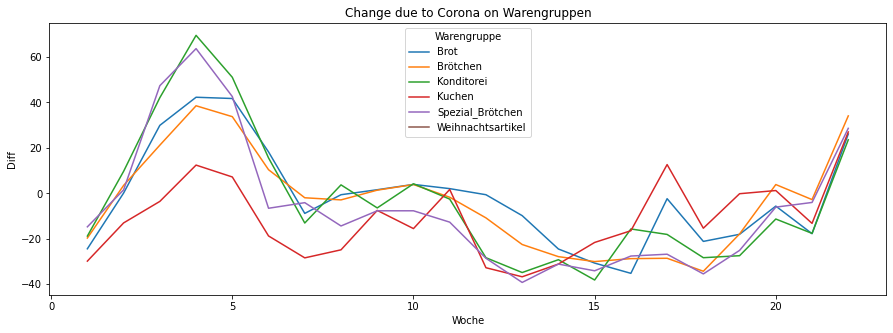

In [1246]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Woche',y='Diff',hue='Warengruppe',data=df_gesamt_wg)
plt.title('Change in % due to Corona on Warengruppen')

#### Filiale 1

In [1266]:
## Explore Coronatrend
df_corona_wg_1=df_corona.query('Filiale==1')
df_2019_wg_1=df_2019.query('Filiale==1')


In [1267]:
df_corona_wg_1=df_corona_wg_1.groupby("Woche")['Brot','Brötchen','Konditorei','Kuchen',
                                         'Spezial_Brötchen','Weihnachtsartikel'].sum().stack().reset_index()
df_corona_wg_1.rename(columns={0:'Umsatz_2020'
                          }, 
                 inplace=True)

In [1268]:
df_2019_wg_1=df_2019_wg_1.groupby("Woche")['Brot','Brötchen','Konditorei','Kuchen',
                                         'Spezial_Brötchen','Weihnachtsartikel'].sum().stack().reset_index()
df_2019_wg_1.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [1269]:
df_gesamt_wg_1=df_2019_wg_1.merge(df_corona_wg_1)
df_gesamt_wg_1["Diff"]=(df_gesamt_wg_1['Umsatz_2020']-df_gesamt_wg_1['Umsatz'])/df_gesamt_wg_1['Umsatz']*100
df_gesamt_wg_1.head()

,Woche,Warengruppe,Umsatz,Umsatz_2020,Diff
0,1,Brot,1787.834526,1328.903181,-25.669677
1,1,Brötchen,1692.456951,1167.330138,-31.027484
2,1,Konditorei,432.428549,285.856379,-33.895119
3,1,Kuchen,1427.750668,910.589878,-36.222066
4,1,Spezial_Brötchen,598.186654,509.810214,-14.774058


Text(0.5, 1.0, 'Change in % due to Corona on Warengruppen for Filiale 1')

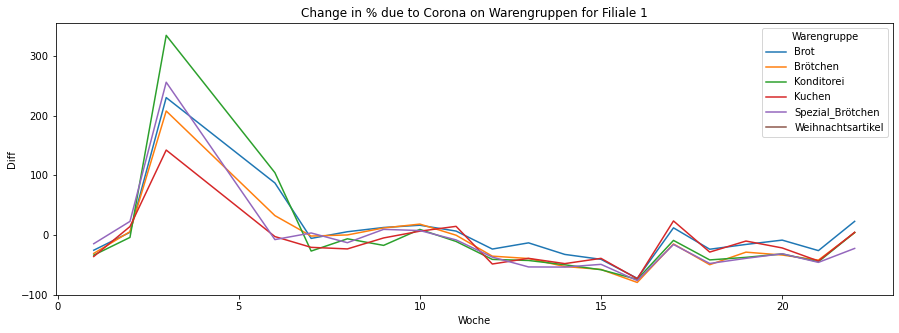

In [1270]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Woche',y='Diff',hue='Warengruppe',data=df_gesamt_wg_1)
plt.title('Change in % due to Corona on Warengruppen for Filiale 1')

#### Filiale 2

In [1272]:
## Explore Coronatrend for Filiale 2
df_corona_wg_2=df_corona.query('Filiale==2')
df_2019_wg_2=df_2019.query('Filiale==2')


In [1273]:
df_corona_wg_2=df_corona_wg_2.groupby("Woche")['Brot','Brötchen','Konditorei','Kuchen',
                                         'Spezial_Brötchen','Weihnachtsartikel'].mean().stack().reset_index()
df_corona_wg_2.rename(columns={0:'Umsatz_2020'
                          }, 
                 inplace=True)

In [1274]:
df_2019_wg_2=df_2019_wg_2.groupby("Woche")['Brot','Brötchen','Konditorei','Kuchen',
                                         'Spezial_Brötchen','Weihnachtsartikel'].mean().stack().reset_index()
df_2019_wg_2.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [1282]:
df_gesamt_wg_2=df_2019_wg_2.merge(df_corona_wg_2)
df_gesamt_wg_2["Diff"]=(df_gesamt_wg_2['Umsatz_2020']-df_gesamt_wg_2['Umsatz'])/df_gesamt_wg_2['Umsatz']*100
df_gesamt_wg_2.head()

,Woche,Warengruppe,Umsatz,Umsatz_2020,Diff
0,1,Brot,358.910080,360.881106,0.549170
1,1,Brötchen,568.429707,623.819687,9.744385
2,1,Konditorei,63.584328,80.527074,26.646104
3,1,Kuchen,284.989431,269.279303,-5.512530
4,1,Spezial_Brötchen,96.682669,95.364423,-1.363477


Text(0.5, 1.0, 'Change in % due to Corona on Warengruppen for Filiale 2')

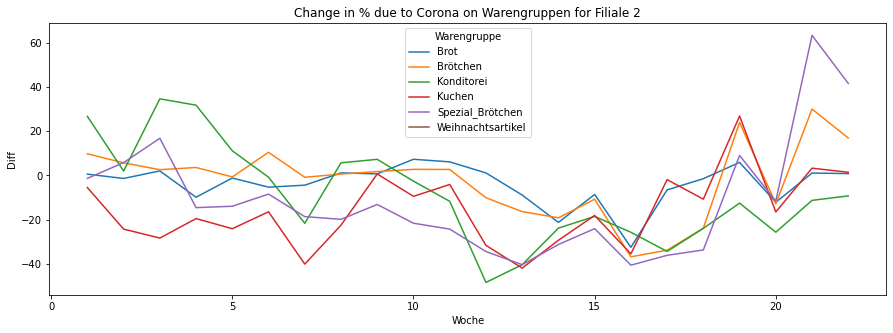

In [1280]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Woche',y='Diff',hue='Warengruppe',data=df_gesamt_wg_2)
plt.title('Change in % due to Corona on Warengruppen for Filiale 2')

#### Filiale 3

In [ ]:
## Explore Coronatrend for Filiale 3

In [1286]:
## Explore Coronatrend
df_corona_wg_3=df_corona.query('Filiale==3')
df_2019_wg_3=df_2019.query('Filiale==3')

In [1287]:
df_corona_wg_3=df_corona_wg_3.groupby("Woche")['Brot','Brötchen','Konditorei','Kuchen',
                                         'Spezial_Brötchen','Weihnachtsartikel'].sum().stack().reset_index()
df_corona_wg_3.rename(columns={0:'Umsatz_2020'
                          }, 
                 inplace=True)

In [1288]:
df_2019_wg_3=df_2019_wg_3.groupby("Woche")['Brot','Brötchen','Konditorei','Kuchen',
                                         'Spezial_Brötchen','Weihnachtsartikel'].mean().stack().reset_index()
df_2019_wg_3.rename(columns={0:'Umsatz'
                          }, 
                 inplace=True)

In [1289]:
df_gesamt_wg_3=df_2019_wg_3.merge(df_corona_wg_3)
df_gesamt_wg_3["Diff"]=(df_gesamt_wg_3['Umsatz_2020']-df_gesamt_wg_3['Umsatz'])/df_gesamt_wg_3['Umsatz']*100
df_gesamt_wg_3.head()

,Woche,Warengruppe,Umsatz,Umsatz_2020,Diff
0,1,Brot,2056.488389,1489.785590,-27.556820
1,1,Brötchen,3580.386007,2856.117596,-20.228780
2,1,Konditorei,563.566135,458.881554,-18.575385
3,1,Kuchen,2070.352945,1466.067369,-29.187563
4,1,Spezial_Brötchen,730.092156,653.304495,-10.517530


Text(0.5, 1.0, 'Change in % due to Corona on Warengruppen for Filiale 3')

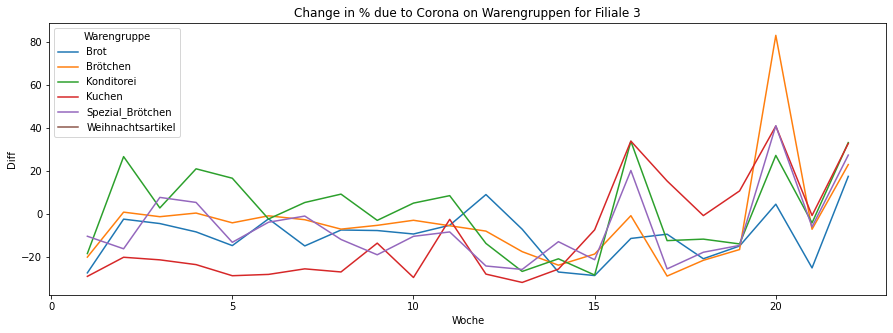

In [1290]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Woche',y='Diff',hue='Warengruppe',data=df_gesamt_wg_3)
plt.title('Change in % due to Corona on Warengruppen for Filiale 3')

## Brot 

In [1294]:
### Renaming Columnlabels
df['Artikelgruppe']=df_new['Artikelgruppe'].apply(lambda x: 'Weizenbrot' if x==1  else 'Wochenende')
df.r(columns={1:'Weizenbrot',2:'Mischbrot',3:'Vollkornbrot',4:'Spezialbrot',5:'Stangenbrote',6:'Brötchen',
                       7:'Süsse_Brötchen', 8:'Herzhafte_Brötchen', 9:'KonditoreiBlech1', 10:'KonditoreiBlech2',11:'Stückgebäck', 
                       12:'Blechkuchen', 13:'Weihnachtsartikel'
                          }, 
                 inplace=True)

In [1295]:
df.head()

,Filiale,Datum,Artikelgruppe,Umsatz,Warengruppe
1190,1,2015-01-02,1,39.994964,Brot
1556,1,2015-01-02,2,152.610944,Brot
3464,1,2015-01-02,3,121.284522,Brot
5189,1,2015-01-02,4,118.786757,Brot
8692,1,2015-01-02,6,220.142630,Brötchen


# Feature Engineering

## Additional Features for salesvolumne on grouplevel

In [835]:
# Define additional features for the single Warengruppen
df_new['Brot']=df_new['Weizenbrot']+df_new+['Mischbrot']+df_new['Vollkornbrot']+df_new['Spezialbrot']+df_new['Stangenbrote']
df_new['Brötchen']=df_new['Brötchen']+df_new['Süsse_Brötchen']
df_new['Spezialbrötchen']=df_new['Herzhafte_Brötchen']
df_new['Konditorei']=df_new['KonditoreiBlech1']+df_new['KonditoreiBlech12']
df_new['Kuchen']=df_new['Stückgebäck']+df_new['Blechkuchen']
df_new['Weihnachtsartikel']=df_new['Weihnachtsartikel']

TypeError: cannot add float64-dtype to DatetimeArray

In [247]:
df_new.columns

Index(['Datum', 'Filiale', 'Weizenbrot', 'Mischbrot', 'Vollkornbrot',
       'Spezialbrot', 'Stangenbrote', 'Brötchen', 'Süsse_Brötchen',
       'Herzhafte_Brötchen', 'KonditoreiBlech1', 'KonditoreiBlech2',
       'Stückgebäck', 'Blechkuchen', 'Weihnachtsartikel', 'Gesamt',
       'Wochentag', 'Jahr', 'Monat'],
      dtype='object', name='Artikelgruppe')